In [18]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import shapefile as shp
import numpy as np
import xarray as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Parameters
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh_path = '/work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/'
save_path = None #'~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= 5
which_mode= 'tseries'

#_____________________________________________________________________________________
input_paths= list()
# input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne_bin_ck0.1/')
# input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_nycander_bin_ck0.1/')
# input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_stormtide_bin_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/')

input_names= list()
# input_names.append('TKE+IDEMIX, jayne')
# input_names.append('TKE+IDEMIX, nycander')
# input_names.append('TKE+IDEMIX, stormtide')
input_names.append('TKE')

vname     = 'temp'
year      = [1958, 2019]
mon, day, record, box, depth = None, None, None, None, None

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None #'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
box_region = list()
box_region.append('global')

#_____________________________________________________________________________________
cstr      = 'blue2red'
cnum      = 20
cref      = None
crange, cmin, cmax, cfac, climit = None, None, None, None, None
chist, ctresh = True, 0.995

#_____________________________________________________________________________________
ncolumn   = 3 
which_dpi = 300
do_rescale= None
do_allcycl= False
do_concat = True
which_mean= 'None'

In [20]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True)

 > found no .pckl file in cach or mesh path
 > load mesh from *.out files: /work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node
/work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/nlvls.out
 > comp e_area
 > comp n_area
 > comp n_resol from n_area
 > compute lsmask
 > save *.shp to /work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/tripyview_fesom2_core2_srt_dep@node_pbnd.shp
 > augment lsmask
 > save *.shp to /work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/tripyview_fesom2_core2_srt_dep@node_focus=0.shp
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node
 > id              = core2_srt_dep@node
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, False
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 

cmin, cmax =  70160296.0 10332272640.0
{'chist': False, 'cstr': 'wbgyr_i', 'ctresh': 0.995, 'cmin': 70160296.0, 'cmax': 10332272640.0, 'cref': 5200000000.0, 'cnum': 20, 'cmap': <matplotlib.colors.ListedColormap object at 0x7f4d83351690>, 'clevel': array([-3.00e+08,  2.00e+08,  7.00e+08,  1.20e+09,  1.70e+09,  2.20e+09,
        2.70e+09,  3.20e+09,  3.70e+09,  4.20e+09,  4.70e+09,  5.20e+09,
        5.70e+09,  6.20e+09,  6.70e+09,  7.20e+09,  7.70e+09,  8.20e+09,
        8.70e+09,  9.20e+09,  9.70e+09,  1.02e+10,  1.07e+10])}


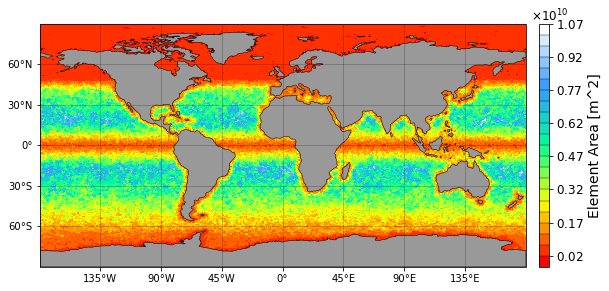

In [4]:
from   netCDF4 import Dataset
mesh = mesh.compute_e_area()
e_area = xr.Dataset(data_vars=dict(e_area=('elem', mesh.e_area, dict(long_name="Element Area", units='m^2'))))
fig, ax, cbar = tpv.plot_hslice(mesh, e_area, cinfo=dict({'chist':False, 'cstr':'wbgyr_i'}))

cmin, cmax =  50520992.0 23206302378.666668
{'chist': False, 'cstr': 'wbgyr_i', 'ctresh': 0.995, 'cmin': 50520992.0, 'cmax': 23206302378.67, 'cref': 12000000000.0, 'cnum': 20, 'cmap': <matplotlib.colors.ListedColormap object at 0x7f4d827fda50>, 'clevel': array([0.0e+00, 1.0e+09, 2.0e+09, 3.0e+09, 4.0e+09, 5.0e+09, 6.0e+09,
       7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
       1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10,
       2.1e+10, 2.2e+10, 2.3e+10, 2.4e+10])}


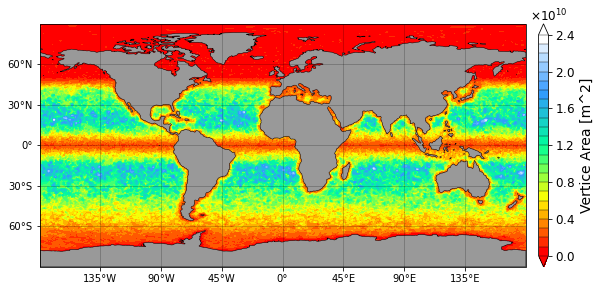

In [5]:
from   netCDF4 import Dataset
mesh = mesh.compute_n_area()
n_area = xr.Dataset(data_vars=dict(n_area=('nod2', mesh.n_area[0,:], dict(long_name="Vertice Area", units='m^2'))))
fig, ax, cbar = tpv.plot_hslice(mesh, n_area, cinfo=dict({'chist':False, 'cstr':'wbgyr_i'}))

cmin, cmax =  8.020307029886624 171.8929372475788
{'chist': False, 'cstr': 'wbgyr_i', 'cnum': 10, 'ctresh': 0.995, 'cmin': 8.02, 'cmax': 171.893, 'cref': 90.0, 'cmap': <matplotlib.colors.ListedColormap object at 0x7f4d82884390>, 'clevel': array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180.])}


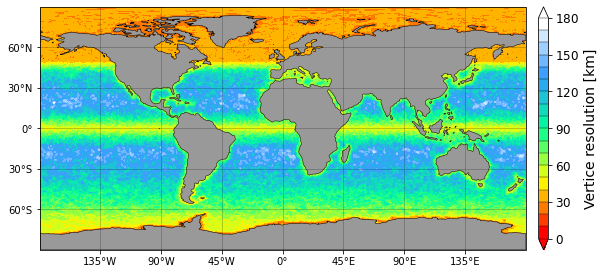

In [6]:
from   netCDF4 import Dataset
n_resol = xr.Dataset(data_vars=dict(n_area=('nod2', mesh.n_resol[0,:]/1000, dict(long_name="Vertice resolution", units='km'))))
fig, ax, cbar = tpv.plot_hslice(mesh, n_resol, cinfo=dict({'chist':False, 'cstr':'wbgyr_i','cnum':10}))

In [21]:
#______________________________________________________________________________________________________
if which_cycl is not None: 
    #__________________________________________________________________________________________________
    if do_allcycl: cycl_s=1
    else         : cycl_s=which_cycl    
    
    #__________________________________________________________________________________________________
    aux_path, aux_name = list(), list()
    input_paths_old, input_names_old = input_paths, input_names
    for ii, (ipath,iname) in enumerate(zip(input_paths,input_names)):
        for ii_cycl in range(cycl_s, which_cycl+1):
            # input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
            aux_path.append(os.path.join(ipath,'{:d}/'.format(ii_cycl)))
            if not do_allcycl: aux_name.append('{}'.format(iname))
            else             : aux_name.append('{:d}) {}'.format(ii_cycl, iname))
            print(ii, aux_path[-1],aux_name[-1])
    input_paths, input_names = aux_path, aux_name
    
    #__________________________________________________________________________________________________
    if ref_path is not None:
        aux_path, aux_name = list(), list()
        ref_path_old, ref_name_old = ref_path, ref_name
        for ii_cycl in range(cycl_s, which_cycl+1):
            #ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
            aux_path.append(os.path.join(ref_path,'{:d}/'.format(ii_cycl)))
            if not do_allcycl: aux_name.append('{}'.format(ref_name))
            else             : aux_name.append('{:d}) {}'.format(ii_cycl, ref_name))
            print('R', ref_path[-1])        
        ref_path, ref_name = aux_path, aux_name
    del(aux_path, aux_name)
        
#______________________________________________________________________________________________________        
cinfo=dict({'cstr':cstr, 'cnum':cnum}) 
if crange   is not None: cinfo['crange']=crange
if cmin     is not None: cinfo['cmin'  ]=cmin
if cmax     is not None: cinfo['cmax'  ]=cmax
if cref     is not None: cinfo['cref'  ]=cref
if cfac     is not None: cinfo['cfac'  ]=cfac  
if climit   is not None: cinfo['climit']=climit  
if chist    is not None: cinfo['chist' ]=chist
if ctresh   is not None: cinfo['ctresh']=ctresh    
if ref_path is not None: cinfo['cref'  ]=0.0    
    
#______________________________________________________________________________________________________
# in case of diff plots
if ref_path is not None:
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record

#______________________________________________________________________________________________________    
# concatenate list = list1+list2
if ref_path is not None: 
    if isinstance(ref_path, list): 
        input_paths, input_names = ref_path + input_paths, ref_name + input_names
    else:    
        input_paths, input_names = list([ref_path]) + input_paths, list([ref_name]) + input_names        
        
#______________________________________________________________________________________________________
# define index regions --> reading shape files
box = list()
shp_path = os.path.join(tpv.__path__[0],'shapefiles/')
for region in box_region:
    if region is 'global' or isinstance(region,list): box.append(region)
    else: 
        print(tpv.__path__[0],region)
        box.append(shp.Reader(os.path.join(shp_path,region)))    

0 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/5/ TKE


In [26]:
#___LOAD FESOM2 DATA___________________________________________________________________________________
list_tseries  = list()
for datapath, descript in zip(input_paths, input_names):
    print(datapath)
    data  = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, 
                                 descript=descript, do_tarithm='None', do_zarithm='wmean', do_info=False)
    data_tseries = tpv.load_index_fesom2(mesh, data, box, do_harithm='wmean')
    
    if   which_mean=='annual':
        data_tseries[0] = data_tseries[0].groupby('time.year').mean('time', keep_attrs=True)
    elif which_mean=='monthly':
        data_tseries[0] = data_tseries[0].groupby('time.month').mean('time', keep_attrs=True)
    list_tseries.append(data_tseries)
    del(data, data_tseries)

if   which_mean=='annual' : time = list_tseries[0][0]['year'].data
elif which_mean=='monthly': time = list_tseries[0][0]['month'].data
else: time = list_tseries[0][0]['time.year'].data + (list_tseries[0][0]['time.month'].data-12)/12     

/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/5/
<xarray.DataArray 'w_z' (nod2: 126858)>
array([1., 1., 1., ..., 1., 1., 1.])
Coordinates:
    lon      (nod2) float32 -179.7 -178.7 -177.8 -177.8 ... 177.9 178.5 179.4
    lat      (nod2) float32 -77.94 -78.01 -78.13 -77.93 ... -77.81 -77.98 -78.02
  * nod2     (nod2) int64 0 1 2 3 4 5 ... 126853 126854 126855 126856 126857
    w_A      (nod2) float64 4.241e+08 3.799e+08 2.212e+08 ... 1.71e+08 1.565e+08


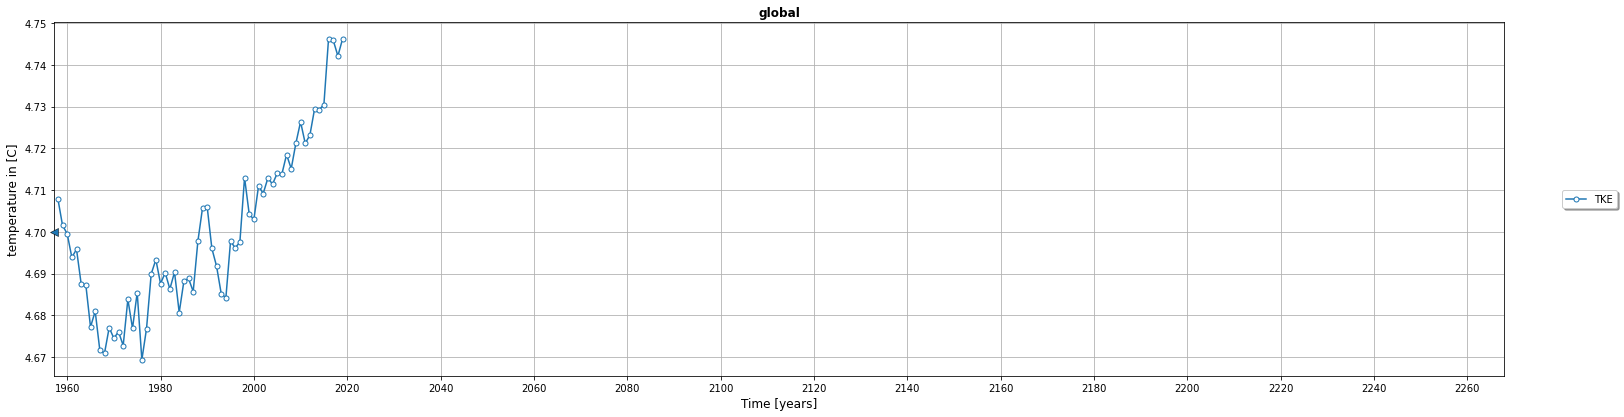

 > save figure: ./tseries_temp_global_y1958-2019_areaweight.png


In [23]:
#___PLOT FESOM2 TIME SERIES___________________________________________________________________________________
save_path ='./'
spath    = save_path
sname    = list(list_tseries[0][0].keys())[0]
slabel   = list_tseries[0][0][sname].attrs['str_lsave']
boxname  = list_tseries[0][0][sname].attrs['boxname']
sboxname = boxname.replace(' ','_')
if spath is not None: spath  = os.path.join(spath,'{}_{}_{}_{}_areaweight.png'.format(which_mode, sname, sboxname, slabel)) 
if save_fname is not None: spath = save_fname
    
fig,ax=tpv.plot_tseries(time, list_tseries, input_names, boxname,  
                              which_cycl=which_cycl, do_allcycl=do_allcycl, do_concat=do_concat, 
                              do_save=spath, save_dpi=which_dpi, )  